In [6]:
'''
Cho dữ liệu housing-prices-dataset/train.csv (https://www.kaggle.com/alphaepsilon/housing-prices-dataset)

Yêu cầu: Thực hiện các công việc sau

1. Xác định các thuộc tính

2. Phân tích đơn biến. 
Để dự đoán giá nhà, giả sử cần các thông tin sau: 'LotArea', 'YearBuilt', '1stFlrSF','2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd' 
=> phân tích các biến này

3. Phân tích hai biến

4. Xử lý dữ liệu thiếu

5. Phát hiện và xử lý ngoại lệ

Note: Đây là một project với rất nhiều thuộc tính. Chúng ta chỉ thực hành trên một số thuộctính để biết cách làm. 
Khi triển khai một project thực tế cần phải lựa chọn các thuộc tính phùhợp và thực hiện các công việc trên tất cả các thuộc tính được lựa chọn.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats

# ********************* 1. Xác định các thuộc tính *********************

In [9]:
print('********************* 1. Xác định các thuộc tính *********************')
house_price = pd.read_csv('data2/housing-prices-dataset/train.csv')

print("Shape of house_price dataframe:",house_price.shape)

print("\nInput variables: 'LotArea', 'YearBuilt', '1stFlrSF','2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd' ")
print(house_price[['LotArea', 'YearBuilt', '1stFlrSF','2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']].info())

print("\nOutput variable: 'SalePrice'")
print(house_price.SalePrice.info())

house_price[['LotArea', 'YearBuilt', '1stFlrSF','2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice']].head(10)

********************* 1. Xác định các thuộc tính *********************
Shape of house_price dataframe: (1460, 81)

Input variables: 'LotArea', 'YearBuilt', '1stFlrSF','2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd' 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   1stFlrSF      1460 non-null   int64
 3   2ndFlrSF      1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   BedroomAbvGr  1460 non-null   int64
 6   TotRmsAbvGrd  1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB
None

Output variable: 'SalePrice'
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
None


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,8450,2003,856,854,2,3,8,208500
1,9600,1976,1262,0,2,3,6,181500
2,11250,2001,920,866,2,3,6,223500
3,9550,1915,961,756,1,3,7,140000
4,14260,2000,1145,1053,2,4,9,250000
5,14115,1993,796,566,1,1,5,143000
6,10084,2004,1694,0,2,3,7,307000
7,10382,1973,1107,983,2,3,7,200000
8,6120,1931,1022,752,2,2,8,129900
9,7420,1939,1077,0,1,2,5,118000


In [11]:
print('---------------------Show the categorical variables----------------------------\n')
for categorical in [i for i in house_price.columns if house_price[i].dtype == 'object']:
    print(f'{categorical} .... {house_price[categorical].unique()}')
    print()

---------------------Show the categorical variables----------------------------

MSZoning .... ['RL' 'RM' 'C (all)' 'FV' 'RH']

Street .... ['Pave' 'Grvl']

Alley .... [nan 'Grvl' 'Pave']

LotShape .... ['Reg' 'IR1' 'IR2' 'IR3']

LandContour .... ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities .... ['AllPub' 'NoSeWa']

LotConfig .... ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope .... ['Gtl' 'Mod' 'Sev']

Neighborhood .... ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Condition1 .... ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Condition2 .... ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

BldgType .... ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle .... ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

RoofStyle .... ['Gab

# ********************* 2. Phân tích đơn biến *********************

********************* 2. Phân tích đơn biến. *********************
 'LotArea', 'YearBuilt', '1stFlrSF','2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice' 

---------- LotArea_numerical_unique1073 ----------
LotArea mean = 10516.828082191782
LotArea median = 9478.5
LotArea mode = 7200
LotArea min = 1300
LotArea max = 215245
LotArea range = 213945
LotArea Q1 (25-th quantile) = 7553.5
LotArea Q3 (75-th quantile) = 11601.5
LotArea IQR (Q3 - Q1) = 4048.0
LotArea variance = 99625649.6503417
LotArea standard deviation = 9981.264932379147
LotArea skewness = 12.195142125084478
LotArea kurtosis = 202.5437927513529


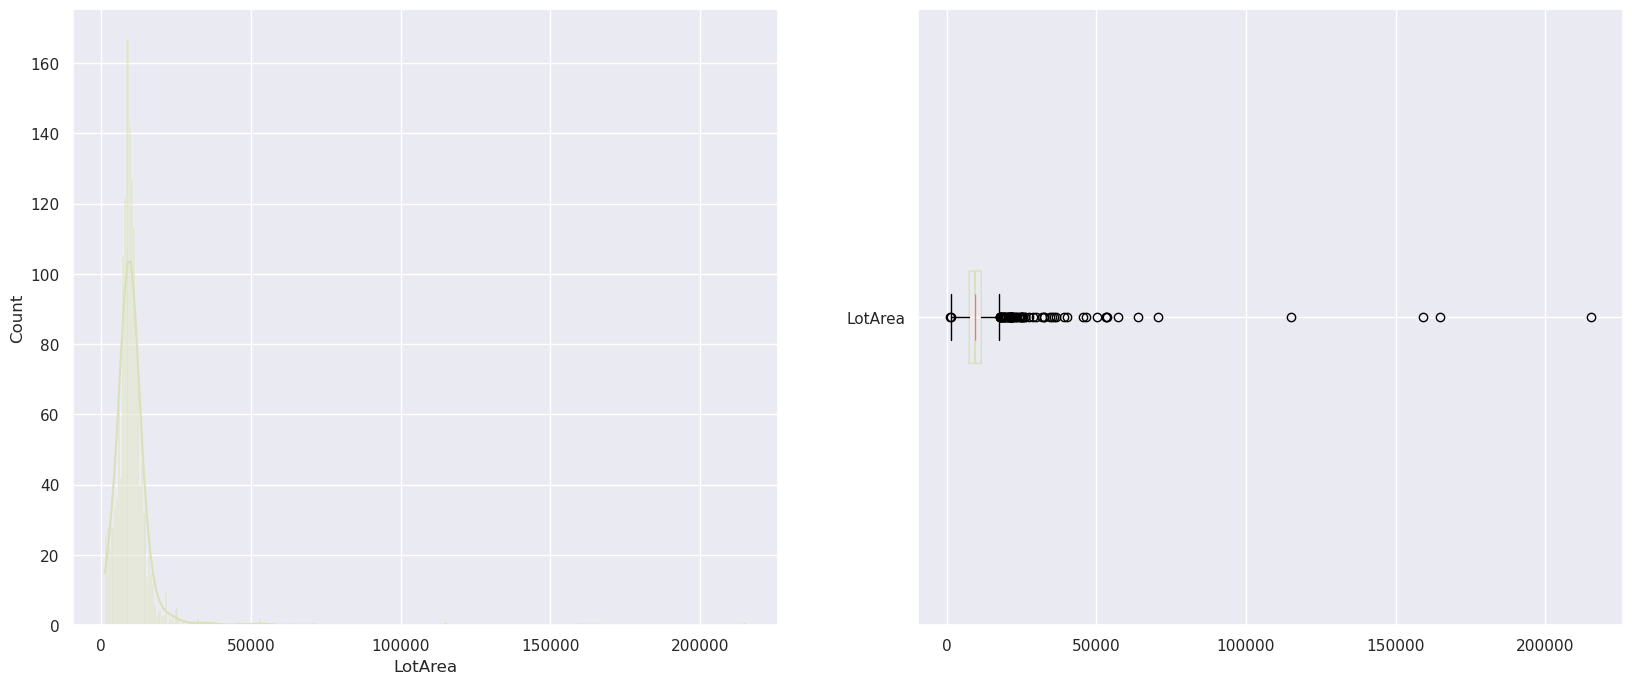


---------- YearBuilt_categorical_unique112 ----------
[1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904, 1905, 1906, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]


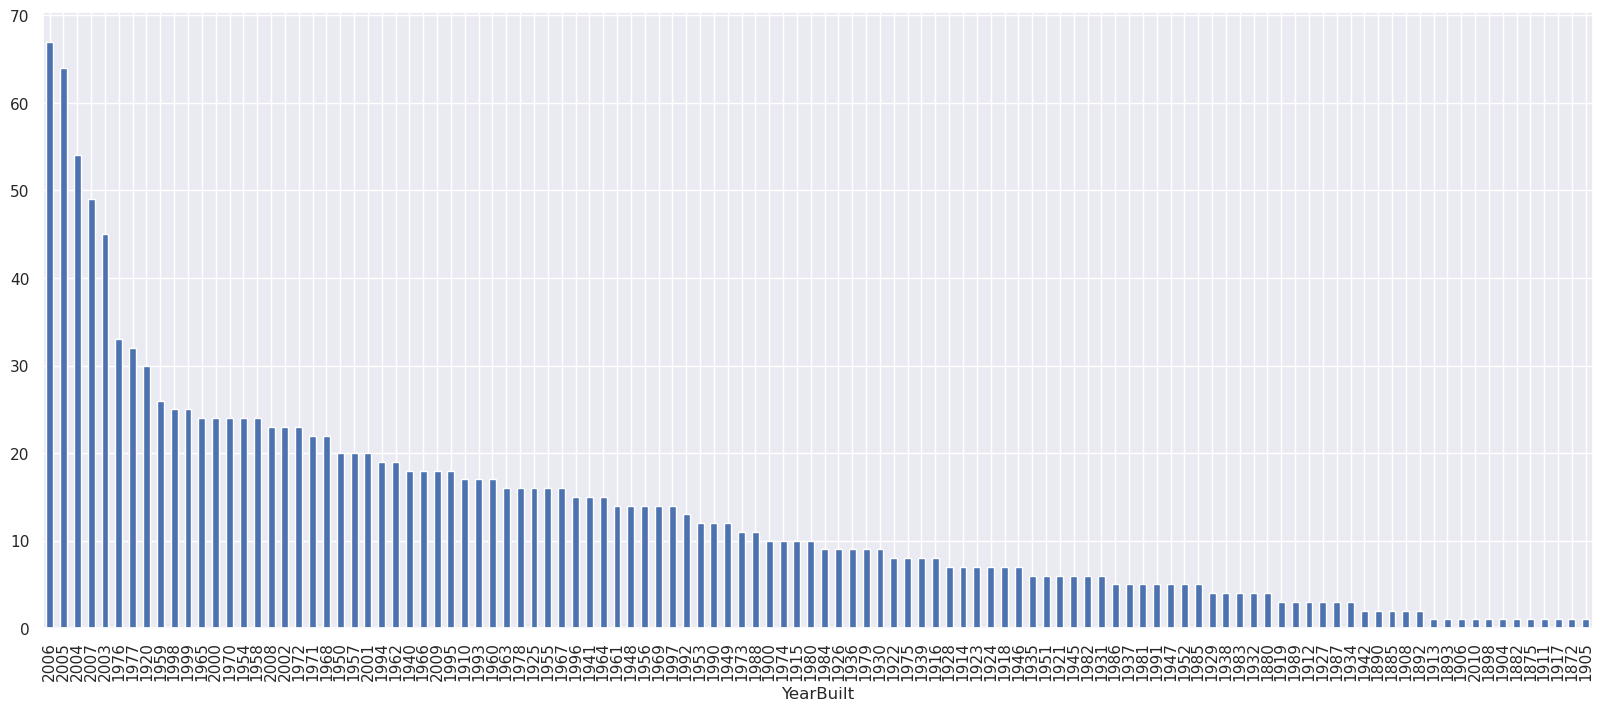


---------- 1stFlrSF_numerical_unique753 ----------
1stFlrSF mean = 1162.626712328767
1stFlrSF median = 1087.0
1stFlrSF mode = 864
1stFlrSF min = 334
1stFlrSF max = 4692
1stFlrSF range = 4358
1stFlrSF Q1 (25-th quantile) = 882.0
1stFlrSF Q3 (75-th quantile) = 1391.25
1stFlrSF IQR (Q3 - Q1) = 509.25
1stFlrSF variance = 149450.07920371392
1stFlrSF standard deviation = 386.5877380410738
1stFlrSF skewness = 1.3753417421837937
1stFlrSF kurtosis = 5.722076026587489


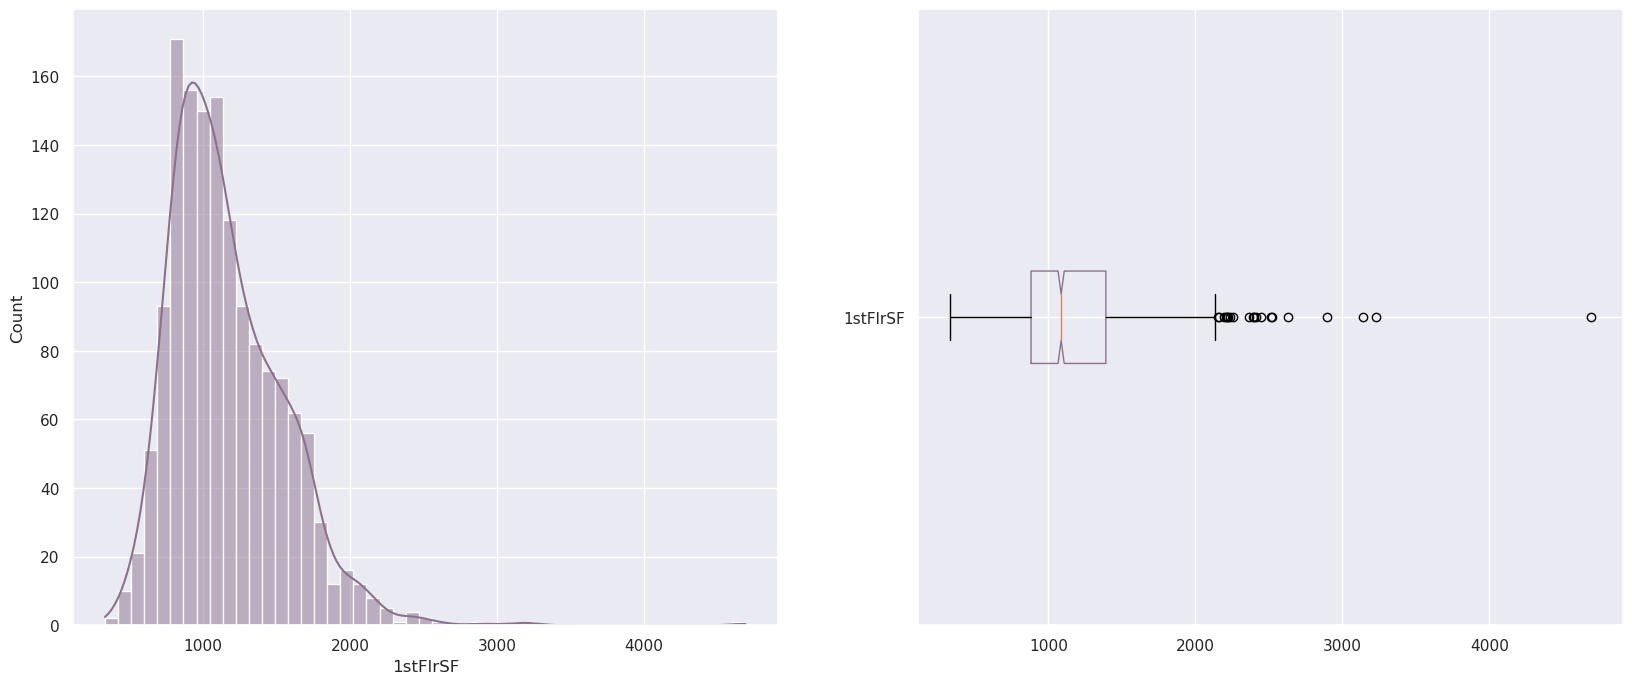


---------- 2ndFlrSF_numerical_unique417 ----------
2ndFlrSF mean = 346.99246575342465
2ndFlrSF median = 0.0
2ndFlrSF mode = 0
2ndFlrSF min = 0
2ndFlrSF max = 2065
2ndFlrSF range = 2065
2ndFlrSF Q1 (25-th quantile) = 0.0
2ndFlrSF Q3 (75-th quantile) = 728.0
2ndFlrSF IQR (Q3 - Q1) = 728.0
2ndFlrSF variance = 190557.0753373038
2ndFlrSF standard deviation = 436.5284358862591
2ndFlrSF skewness = 0.8121942731961613
2ndFlrSF kurtosis = -0.5556767272864769


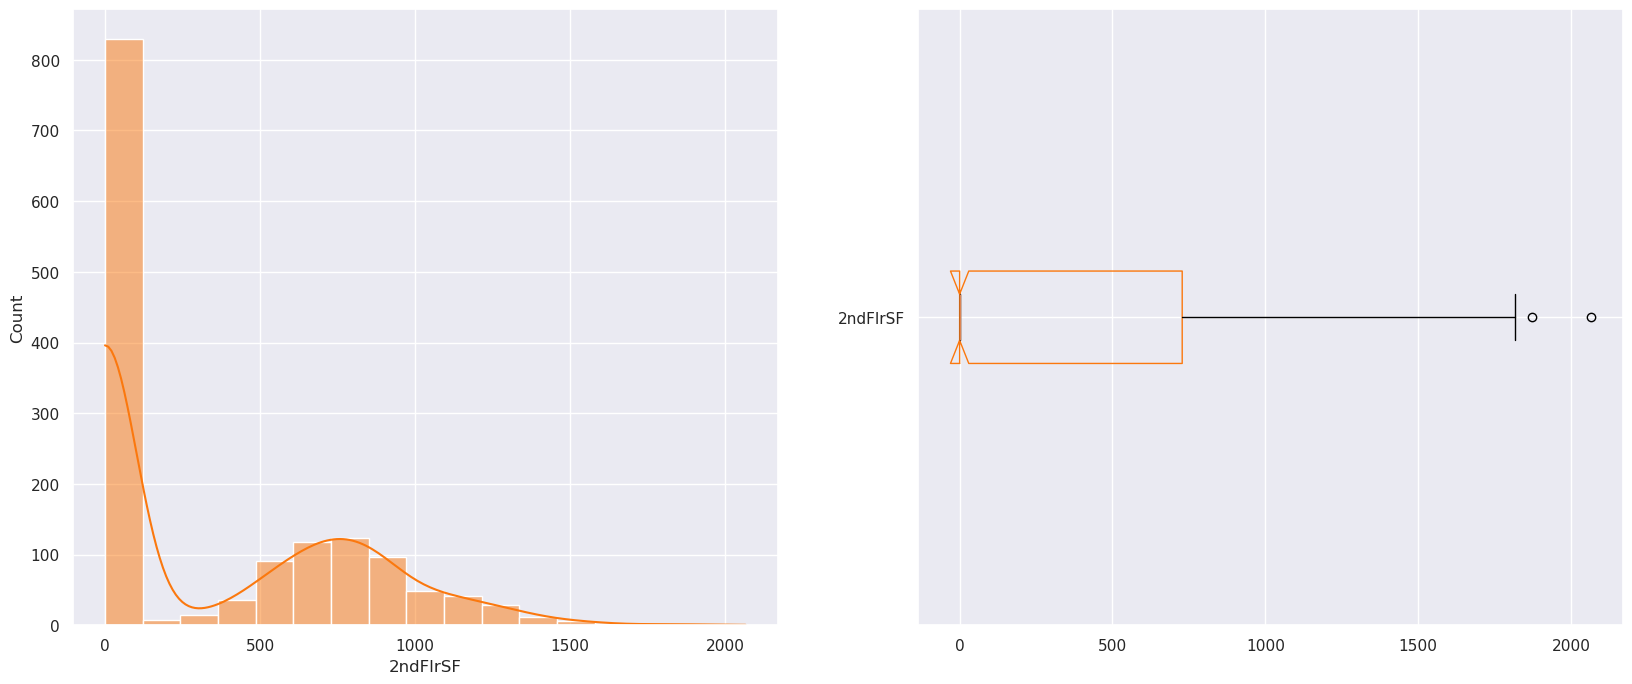


---------- FullBath_categorical_unique4 ----------
[0, 1, 2, 3]


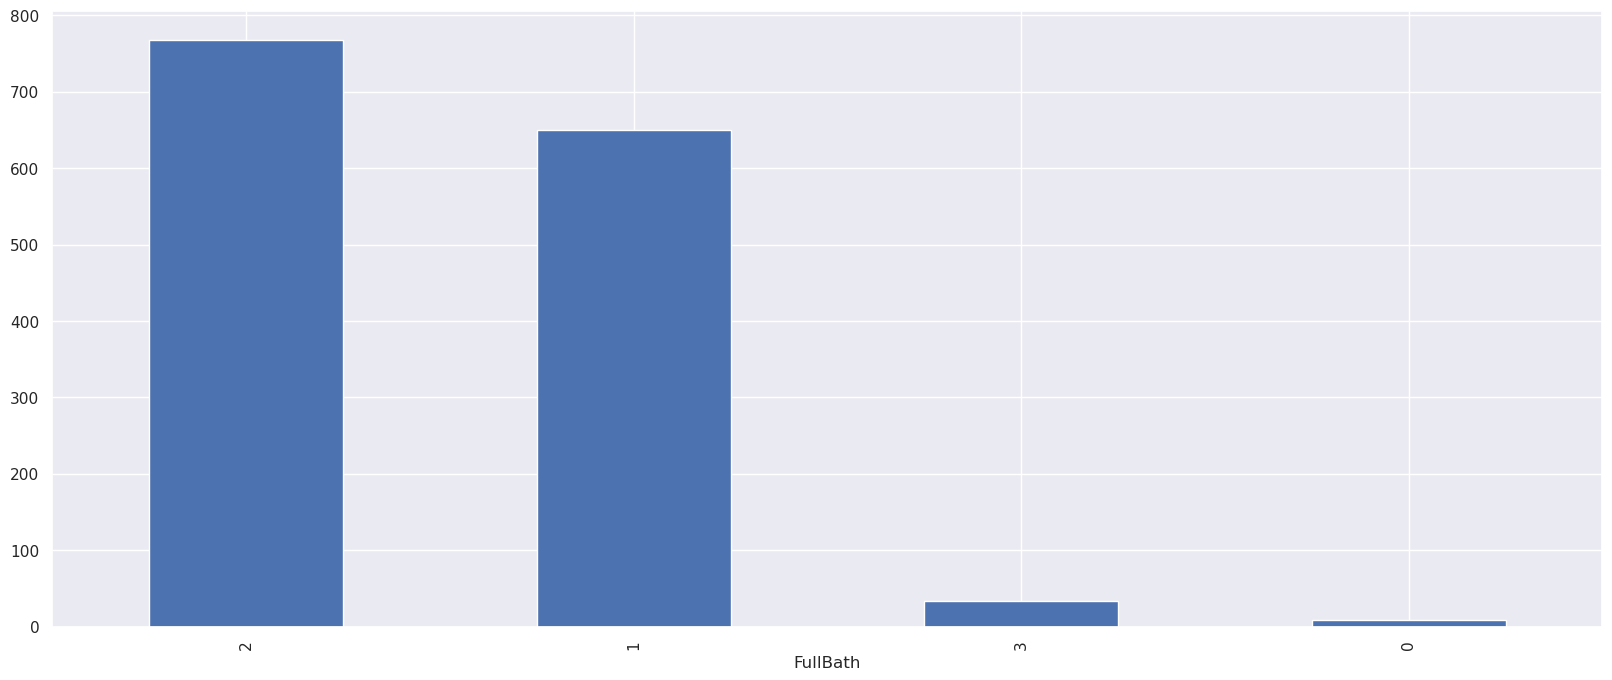


---------- BedroomAbvGr_categorical_unique8 ----------
[0, 1, 2, 3, 4, 5, 6, 8]


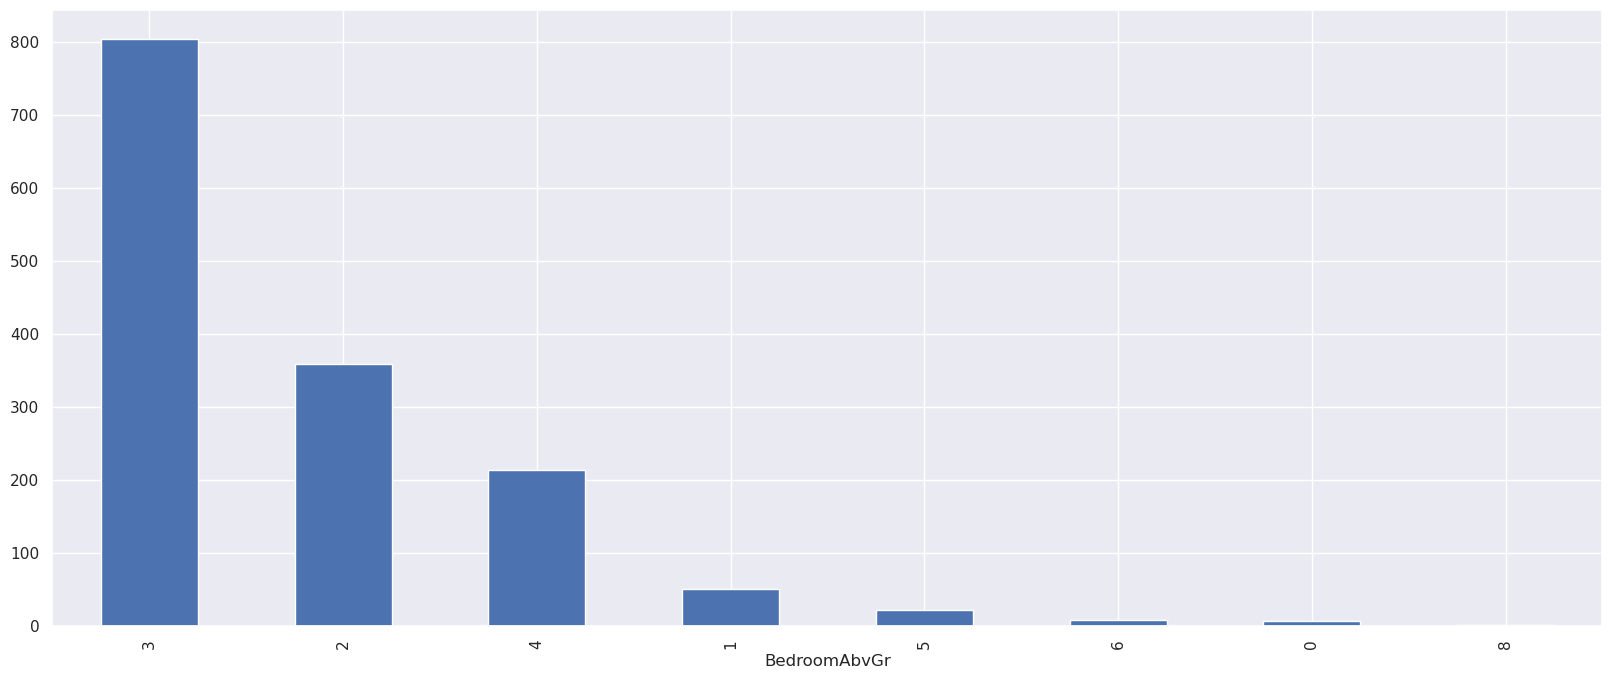


---------- TotRmsAbvGrd_categorical_unique12 ----------
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14]


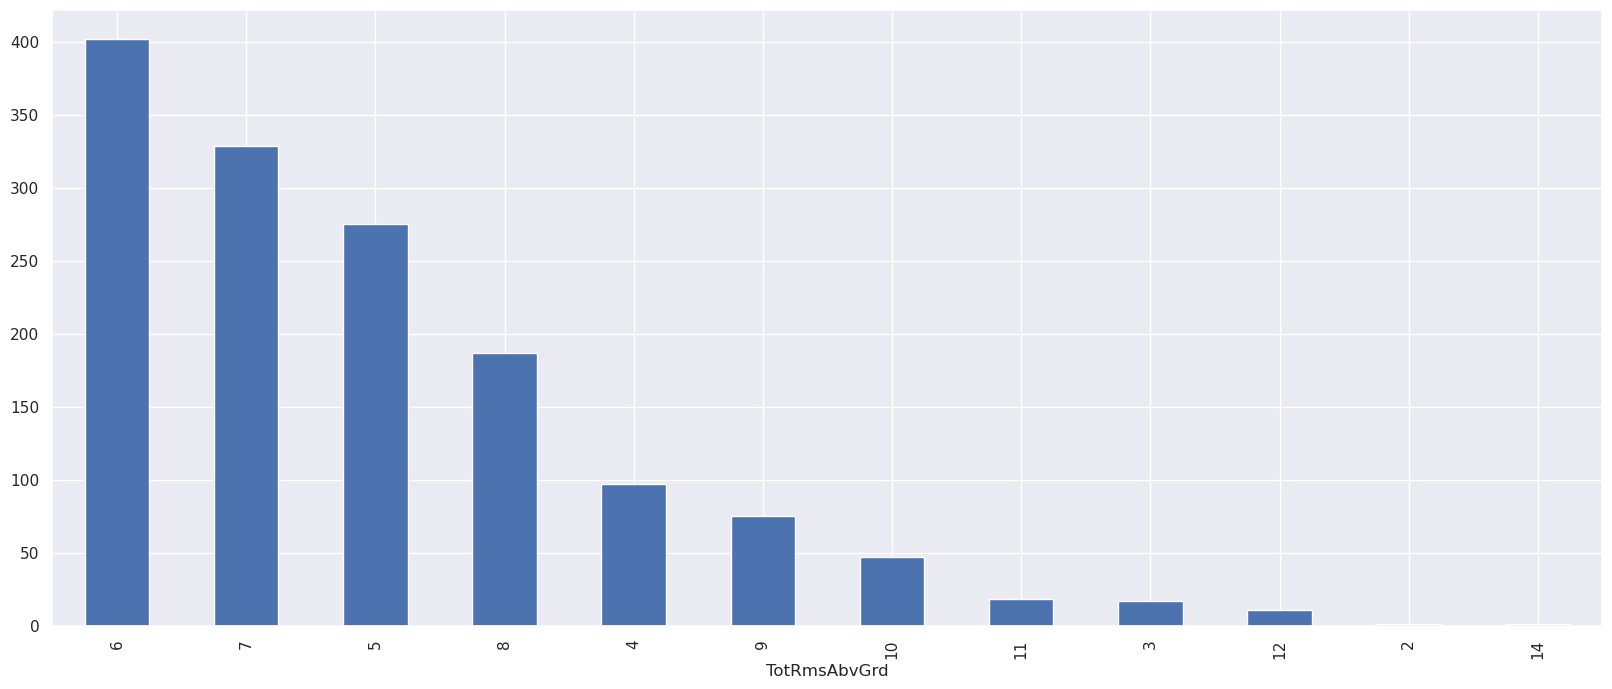


---------- SalePrice_numerical_unique663 ----------
SalePrice mean = 180921.19589041095
SalePrice median = 163000.0
SalePrice mode = 140000
SalePrice min = 34900
SalePrice max = 755000
SalePrice range = 720100
SalePrice Q1 (25-th quantile) = 129975.0
SalePrice Q3 (75-th quantile) = 214000.0
SalePrice IQR (Q3 - Q1) = 84025.0
SalePrice variance = 6311111264.297451
SalePrice standard deviation = 79442.50288288663
SalePrice skewness = 1.880940746034036
SalePrice kurtosis = 6.509812011089439


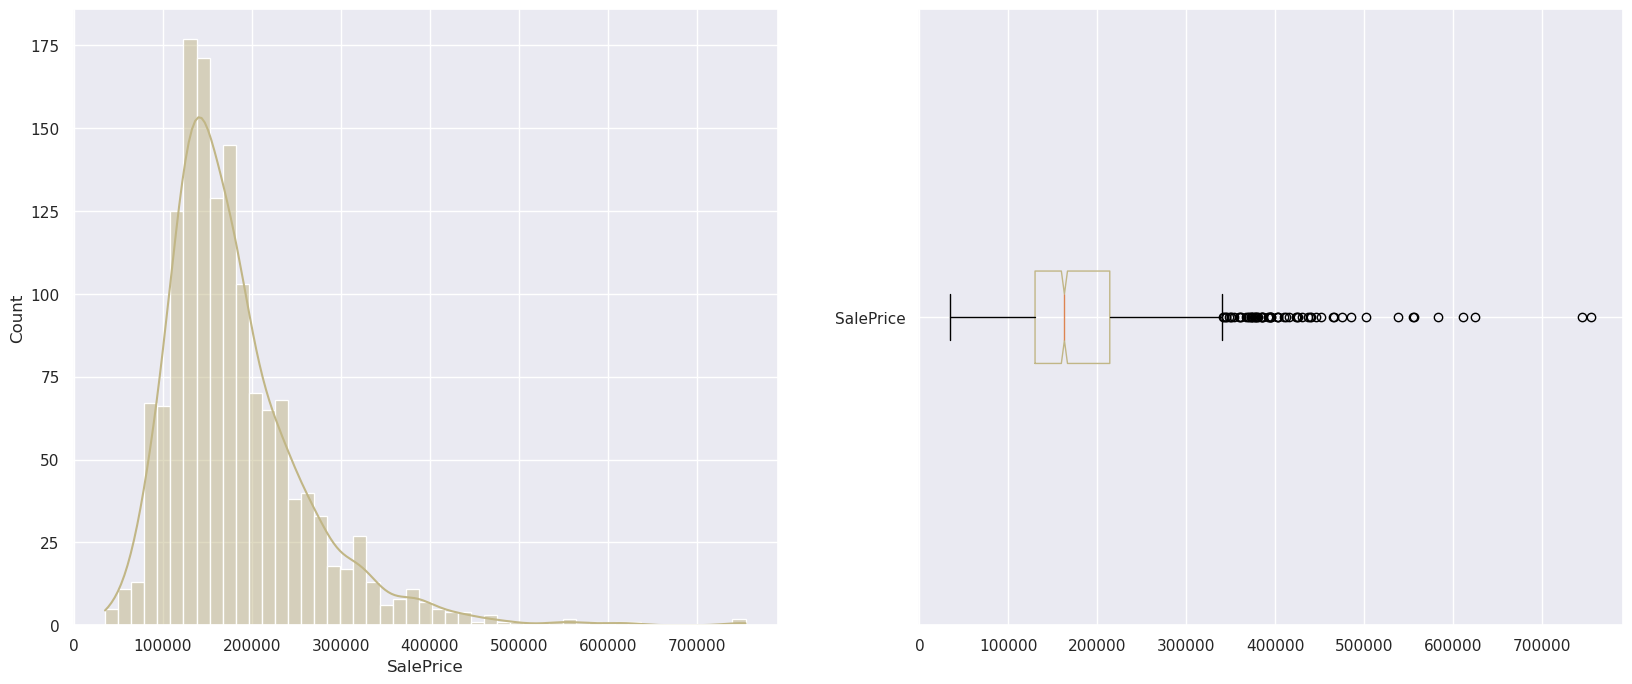

In [18]:
print('********************* 2. Phân tích đơn biến. *********************')
print(" 'LotArea', 'YearBuilt', '1stFlrSF','2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice' ")
print()

import random

def univariate_analysis(data,variable):
    print(f'---------- {variable}_numerical_unique{len(data[variable].unique())} ----------')
    print(f'{variable} mean = {data[variable].mean()}')
    print(f'{variable} median = {data[variable].median()}')
    print(f'{variable} mode = {stats.mode(data[variable])[0]}')
    print(f'{variable} min = {data[variable].min()}')
    print(f'{variable} max = {data[variable].max()}')
    print(f'{variable} range = {data[variable].max() - data[variable].min()}')
    print(f'{variable} Q1 (25-th quantile) = {np.quantile(data[variable], 0.25)}')
    print(f'{variable} Q3 (75-th quantile) = {np.quantile(data[variable], 0.75)}')
    print(f'{variable} IQR (Q3 - Q1) = {stats.iqr(data[variable])}')
    print(f'{variable} variance = {data[variable].var()}')
    print(f'{variable} standard deviation = {data[variable].std()}')
    print(f'{variable} skewness = {stats.skew(data[variable])}')
    print(f'{variable} kurtosis = {stats.kurtosis(data[variable])}')

    clr = "#{:06x}".format(random.randint(0,0xFFFFFF))

    sbn.set_theme(style='darkgrid')
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sbn.histplot(data[variable], color=clr, kde=True)
    plt.subplot(1,2,2)
    plt.boxplot(x=data[variable], tick_labels=[variable], boxprops=dict(color=clr), notch=True, vert=False)
    plt.show()
    print()

for col in ['LotArea', 'YearBuilt', '1stFlrSF','2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice']:
    if len(house_price[col].unique()) < 150:
        print(f'---------- {col}_categorical_unique{len(house_price[col].unique())} ----------')
        print(f'{sorted(house_price[col].unique())}')
        plt.figure(figsize=(20,8))
        house_price[col].value_counts().plot.bar()
        plt.show()
        print()
    else:
        univariate_analysis(house_price, col)

# ********************* 3. Phân tích hai biến *********************
## Continuous & Continuous

********************* 3. Phân tích hai biến *********************
Continuous & Continuous: 'LotArea', '1stFlrSF','2ndFlrSF', 'SalePrice'



<Figure size 2000x1500 with 0 Axes>

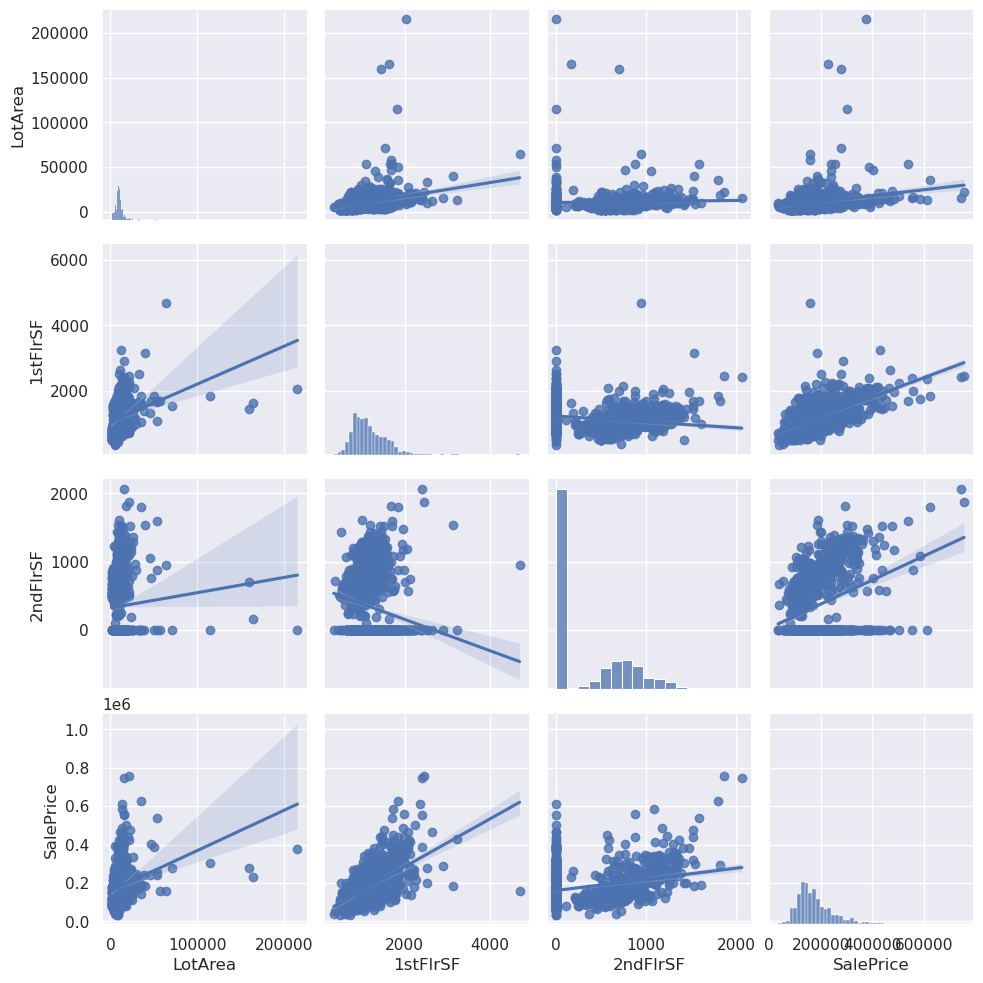



Pearson correlation table:

            LotArea  1stFlrSF  2ndFlrSF  SalePrice
LotArea    1.000000  0.299475  0.050986   0.263843
1stFlrSF   0.299475  1.000000 -0.202646   0.605852
2ndFlrSF   0.050986 -0.202646  1.000000   0.319334
SalePrice  0.263843  0.605852  0.319334   1.000000


In [23]:
print('********************* 3. Phân tích hai biến *********************')
print("Continuous & Continuous: 'LotArea', '1stFlrSF','2ndFlrSF', 'SalePrice'\n")

#Draw pairplot (or diagonal plot)
plt.figure(figsize=(20,15))
sbn.pairplot(house_price[['LotArea', '1stFlrSF','2ndFlrSF', 'SalePrice']], kind='reg')
plt.show()
print()

#Create Pearson correlation coefficient table
print('\nPearson correlation table:\n')
print(house_price[['LotArea', '1stFlrSF','2ndFlrSF', 'SalePrice']].corr())

# ********************* 3. Phân tích hai biến *********************
## Categorical & Categorical

********************* 3. Phân tích hai biến *********************
Categorical & Categorical: 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'

Pairs of categorical variables:
   FullBath ~ BedroomAbvGr
   FullBath ~ TotRmsAbvGrd
   BedroomAbvGr ~ TotRmsAbvGrd

------------------FullBath ~ BedroomAbvGr------------------
BedroomAbvGr  0   1    2    3    4   5  6  8
FullBath                                    
0             5   2    2    0    0   0  0  0
1             1  42  213  352   37   5  0  0
2             0   6  143  443  156  12  7  1
3             0   0    0    9   20   4  0  0

Hypothesis testing Chi2:
   H0: FullBath and BedroomAbvGr are Independent
   Ha: FullBath and BedroomAbvGr are Dependent

Chi2 statistics = 898.9300586036229
P-value = 9.022959522651409e-177 < 0.05
Degree of freedom = 21

Accept Ha: FullBath and BedroomAbvGr are Dependent



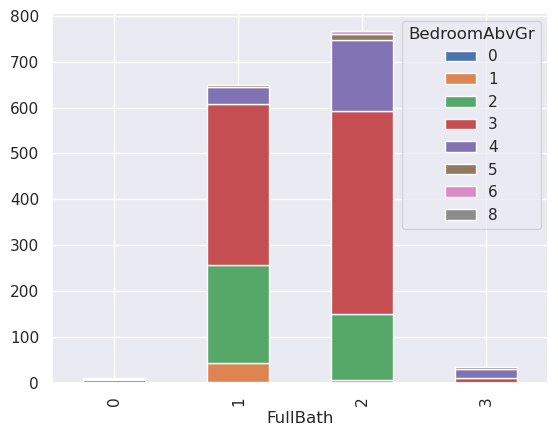


------------------FullBath ~ TotRmsAbvGrd------------------
TotRmsAbvGrd  2   3   4    5    6    7    8   9   10  11  12  14
FullBath                                                        
0              0   1   4    1    2    1    0   0   0   0   0   0
1              1  16  79  210  226   80   29   8   1   0   0   0
2              0   0  14   63  174  245  154  61  39  10   7   1
3              0   0   0    1    0    3    4   6   7   8   4   0

Hypothesis testing Chi2:
   H0: FullBath and TotRmsAbvGrd are Independent
   Ha: FullBath and TotRmsAbvGrd are Dependent

Chi2 statistics = 694.2666939982374
P-value = 8.398586715893026e-125 < 0.05
Degree of freedom = 33

Accept Ha: FullBath and TotRmsAbvGrd are Dependent



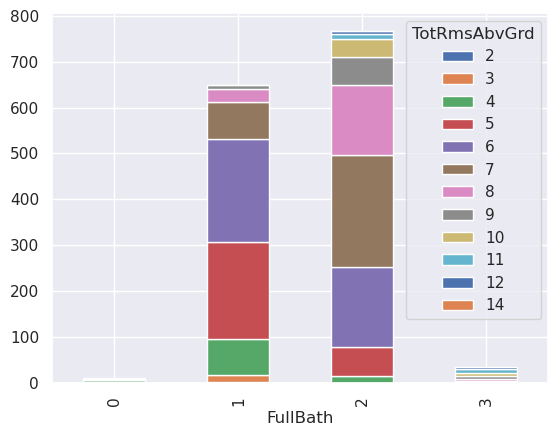


------------------BedroomAbvGr ~ TotRmsAbvGrd------------------
TotRmsAbvGrd  2   3   4    5    6    7   8   9   10  11  12  14
BedroomAbvGr                                                   
0              0   1   2    2    1    0   0   0   0   0   0   0
1              1  14  18    5    5    4   2   1   0   0   0   0
2              0   2  73  145   99   30   5   0   2   2   0   0
3              0   0   3  122  289  252  97  26  10   3   2   0
4              0   0   1    1    8   43  78  44  23  11   4   0
5              0   0   0    0    0    0   5   3   8   2   3   0
6              0   0   0    0    0    0   0   1   4   0   2   0
8              0   0   0    0    0    0   0   0   0   0   0   1

Hypothesis testing Chi2:
   H0: BedroomAbvGr and TotRmsAbvGrd are Independent
   Ha: BedroomAbvGr and TotRmsAbvGrd are Dependent

Chi2 statistics = 2994.515338085243
P-value = 0.0 < 0.05
Degree of freedom = 77

Accept Ha: BedroomAbvGr and TotRmsAbvGrd are Dependent



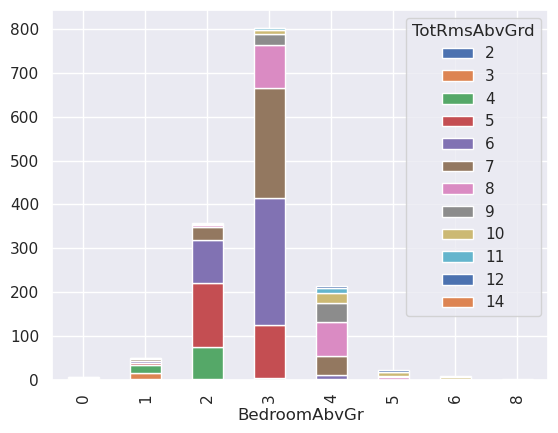

In [40]:
print('********************* 3. Phân tích hai biến *********************')
print("Categorical & Categorical: 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'")

from scipy.stats import chi2_contingency
import itertools

combination_pairs = list(itertools.combinations(['FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'],2)) #Generate all pairs of variables
print('\nPairs of categorical variables:')
for categ1,categ2 in combination_pairs:
    print(f'   {categ1} ~ {categ2}')
print()

def bivariate_categ1_categ2_analysis(data, categ1, categ2):
    print(f'------------------{categ1} ~ {categ2}------------------')
    
    table_2way = pd.crosstab(data[categ1], data[categ2])
    print(table_2way)
    print()
    
    
    stat, p, DoF, expected = chi2_contingency(table_2way)
    print('Hypothesis testing Chi2:')
    print(f'   H0: {categ1} and {categ2} are Independent')
    print(f'   Ha: {categ1} and {categ2} are Dependent\n')
    print(f'Chi2 statistics = {stat}')
    print(f'P-value = {p}'+ (' < 0.05' if p<0.05 else ' >= 0.05'))
    print(f'Degree of freedom = {DoF}\n')
    
    if p >= 0.05: print(f'Accept H0: {categ1} and {categ2} are Independent\n')
    else: print(f'Accept Ha: {categ1} and {categ2} are Dependent\n')

    table_2way.plot.bar(stacked=True)
    plt.show()
    print()

for categ1, categ2 in combination_pairs:
    bivariate_categ1_categ2_analysis(house_price, categ1, categ2)

# ********************* 3. Phân tích hai biến *********************
## Continuous & Categorical

In [29]:
print('********************* 3. Phân tích hai biến *********************')

print('Categorical & Continuous')
print("   Categorical: 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'")
print("   Continuous: 'LotArea', '1stFlrSF','2ndFlrSF', 'SalePrice'")

conti_list = ['LotArea', 'FirstFlrSF','SecondndFlrSF', 'SalePrice']
categ_list = ['FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
combination_conti_categ =  [(conti, categ) for conti in conti_list for categ in categ_list ]

new_house_price = house_price.rename(columns={'1stFlrSF':'FirstFlrSF', '2ndFlrSF':'SecondndFlrSF'})

print('\nContinuous ~ Categorical combination pairs:')
for conti, categ in combination_conti_categ:
    print(f'   {conti} ~ {categ}')
print()

#-------------------------------Build bi-variate Continuous~1_Categorical analysis function-----------------------------------#
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

def conti_1categ_analysis (data, conti, categ):
    print(f'\n------------------{conti} ~ {categ}------------------')
    print(f'Unique values of {categ}: {sorted(data[categ].unique())}')
    df_categ_conti = data[[categ,conti]]
    dict_categ_conti = data[conti].groupby(data[categ]).apply(list).to_dict()
    
    model = ols(f'{conti} ~ C({categ})', data=df_categ_conti).fit()
    
    #Leuven test for equal variances
    pL = stats.levene(*dict_categ_conti.values())[1] #The operator * ensures each item in the list of values becomes a separate argument to levene.

    #Shapiro test for normality of model residual
    pS = stats.shapiro(model.resid)[1]
    
    if (pL >= 0.05) and (pS >= 0.05):
        print('\nThe model satisfies Leuven test nd Shapiro-Wilk test, can do Anova-1-way:')
        print(sm.stats.anova_lm(model, typ=2)) # Create anova table, typ=2 for Sum of Squares
        p_anova = stats.f_oneway(*dict_categ_conti.values())[1]
        print(f'\nAnova-1-way p-value = {p_anova}' + ' < 0.05' if p_anova<0.05 else ' >= 0.05')
        if p_anova >= 0.5: print(f'Accept H0: there are no significant differences between {conti} ~ {categ} groups')
        else:
            print(f'Accept Ha: there is at least one significant difference between {conti} ~ {categ} groups')
            print('Perform TukeyHSD pairwise analysis:')
            tukeyHSD = pairwise_tukeyhsd(endog = data[conti], groups = data[categ], alpha = 0.05)
            print(tukeyHSD)

    else:
        print('\nConditions of Anova-1-way are not satisfied')
        print('Use Kruskal-Wallis test instead!')
        p_kruskal = stats.kruskal(*dict_categ_conti.values())[1]
        print(f'\nKruskal-Wallis p-value = {p_kruskal}' + ' < 0.05' if p_kruskal<0.05 else ' >= 0.05')
        if p_kruskal >= 0.5: print(f'Accept H0: there are no significant differences between {conti} ~ {categ} groups')
        else:
            print(f'Accept Ha: there is at least one significant difference between {conti} ~ {categ} groups')
            print('Perform Dunn pairwise analysis:')
            dunn = posthoc_dunn(data, val_col=conti, group_col=categ, p_adjust='bonferroni')
            print(dunn)

for conti, categ in combination_conti_categ:
    conti_1categ_analysis(new_house_price, conti, categ)

********************* 3. Phân tích hai biến *********************
Categorical & Continuous
   Categorical: 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'
   Continuous: 'LotArea', '1stFlrSF','2ndFlrSF', 'SalePrice'

Continuous ~ Categorical combination pairs:
   LotArea ~ FullBath
   LotArea ~ BedroomAbvGr
   LotArea ~ TotRmsAbvGrd
   FirstFlrSF ~ FullBath
   FirstFlrSF ~ BedroomAbvGr
   FirstFlrSF ~ TotRmsAbvGrd
   SecondndFlrSF ~ FullBath
   SecondndFlrSF ~ BedroomAbvGr
   SecondndFlrSF ~ TotRmsAbvGrd
   SalePrice ~ FullBath
   SalePrice ~ BedroomAbvGr
   SalePrice ~ TotRmsAbvGrd


------------------LotArea ~ FullBath------------------
Unique values of FullBath: [0, 1, 2, 3]

Conditions of Anova-1-way are not satisfied
Use Kruskal-Wallis test instead!

Kruskal-Wallis p-value = 1.3324155054809103e-20 < 0.05
Accept Ha: there is at least one significant difference between LotArea ~ FullBath groups
Perform Dunn pairwise analysis:
          0             1             2             3
0  1.000

# ********************* 4. Xử lý dữ liệu thiếu *********************

In [32]:
print('Check the number of null values:\n')
print(new_house_price[['LotArea', 'FirstFlrSF','SecondndFlrSF', 'SalePrice', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']].isnull().sum())
print('\nThere is no null value')

Check the number of null values:

LotArea          0
FirstFlrSF       0
SecondndFlrSF    0
SalePrice        0
FullBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
dtype: int64

There is no null value


# ********************* 5. Phát hiện và xử lý ngoại lệ *********************

In [35]:
print('Continuous variables that need to process outliers:', conti_list)
print()

def remove_outliers (data, variable):
    q1 = np.quantile(data[variable], 0.25)
    q3 = np.quantile(data[variable], 0.75)
    iqr = stats.iqr(data[variable])

    condition = (data[variable] >= q1 - 1.5*iqr) & (data[variable] <= q3 + 1.5*iqr)
    no_outliers = np.extract(condition, data[variable])

    return no_outliers

for var in conti_list:
    var_no_out = remove_outliers(new_house_price, var)
    print(f'{var} without outliers size_{len(var_no_out)} (original size {len(new_house_price[var])}):\n{var_no_out}')
    print()

Continuous variables that need to process outliers: ['LotArea', 'FirstFlrSF', 'SecondndFlrSF', 'SalePrice']

LotArea without outliers size_1391 (original size 1460):
[ 8450  9600 11250 ...  9042  9717  9937]

FirstFlrSF without outliers size_1440 (original size 1460):
[ 856 1262  920 ... 1188 1078 1256]

SecondndFlrSF without outliers size_1458 (original size 1460):
[ 854    0  866 ... 1152    0    0]

SalePrice without outliers size_1399 (original size 1460):
[208500 181500 223500 ... 266500 142125 147500]

